In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import math

In [ ]:
# функция сигмоиды
def f(x):
    s = 1 / (1 + math.exp(-x))
    return s

In [ ]:
# производная
def df (x):
    df = f(x) * (1-f(x))
    return df

In [ ]:
# входы нейронов
x1 = [0, 0, 0, 0, 1, 1, 1, 1]
x2 = [0, 0, 1, 1, 0, 0, 1, 1]
x3 = [0, 1, 0, 1, 0, 1, 0, 1]

# эталонный выход сети
A0 = [0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
x = [0, 0, 0, 0, 0, 0]
y = [0, 0, 0]

# Заполняем случайно ячейки с весами от -0,1 до +0,1
w14 = 0.2*random.random() - 0.1
w15 = 0.2*random.random() - 0.1
w24 = 0.2*random.random() - 0.1
w25 = 0.2*random.random() - 0.1
w34 = 0.2*random.random() - 0.1
w35 = 0.2*random.random() - 0.1
w46 = 0.2*random.random() - 0.1
w56 = 0.2*random.random() - 0.1

print('Начальные значения')
print('w14 = ', w14)
print('w15 = ', w15)
print('w24 = ', w24)
print('w25 = ', w25)
print('w34 = ', w34)
print('w35 = ', w35)
print('w46 = ', w46)
print('w56 = ', w56)

v = 0.8  # задаём скорость обучения
Ep = 150 # задаём количество эпох обучения
n = 8 # количество примеров в ОВ
E6 = [] # список для ошибок
j = 1
E = []

Начальные значения
w14 =  0.05110378916595765
w15 =  0.016292738125657416
w24 =  -0.058964665112944695
w25 =  0.028704357242954837
w34 =  -0.07902905334496808
w35 =  0.07122319525797405
w46 =  0.06386202091758658
w56 =  0.02337876858214638


In [ ]:
# цикл по эпохам
while j < Ep:
    print ('Эпоха ', j)
    # цикл по примерам обучающей выборки
    for i in range(1, n-1):
        x[0] = x1[i]
        x[1] = x2[i]
        x[2] = x3[i]
        A = A0[i]

        x[3] = x[0] * w14 + x[1] * w24 + x[2] * w34
        y[0] = f(x[3])

        x[4] = x[0] * w15 + x[1] * w25 + x[2] * w35
        y[1] = f(x[4])

        x[5] = y[0] * w46 + y[1] * w56
        y[2] = f(x[5])

        # E6.append(0.5*(A - y[2])*(A - y[2]))
        E6.append((A - y[2])*(A - y[2]))

        dw = E6[j - 1] * df(y[2]) # ошибка весов последнего слоя
        w46 = w46 - y[0] * dw * v # коррекци весов последнего слоя
        w56 = w56 - y[1] * dw * v # коррекци весов последнего слоя

        E4 = w46 * dw # ошибка 4 нейрона
        dw4 = E4 * df(y[0]) # cкорректированная ошибка 4 нейрона

        # коррекция весов сигналов, входящих в 4 нейрон
        w14 = w14 - x[0] * dw4 * v
        w24 = w24 - x[1] * dw4 * v
        w34 = w34 - x[2] * dw4 * v

        E5 = w56 * dw # ошибка 5 нейрона
        dw5 = E5 * df(y[1]) # cкорректированная ошибка 5 нейрона

        # коррекция весов сигналов, входящих в 5 нейрон
        w15 = w15 - x[0] * dw5 * v
        w25 = w25 - x[1] * dw5 * v
        w35 = w35 - x[2] * dw5 * v

    E.append(E6[-1])
    if E6[-1] < 0.001:
        j = 150

    print('X6 = ', x[5])
    print('Y(6)', y[2])
    print('Ошибка', E6[-1])
    print('w14 = ', w14)
    print('w15 = ', w15)
    print('w24 = ', w24)
    print('w25 = ', w25)
    print('w34 = ', w34)
    print('w35 = ', w35)
    print('w46 = ', w46)
    print('w56 = ', w56)

    j = j + 1

Эпоха  1
X6 =  -0.08046414189683439
Y(6) 0.47989481090602737
Ошибка 0.23029902953453177
w14 =  0.053038937183613556
w15 =  0.019848436438295647
w24 =  -0.05815513309150007
w25 =  0.0310940425684863
w34 =  -0.07877837248925464
w35 =  0.07303138299698522
w46 =  -0.08021032868634956
w56 =  -0.12821642663707206
Эпоха  2
X6 =  -0.22950920111391349
Y(6) 0.44287324001949063
Ошибка 0.19613670672536135
w14 =  0.059806637364408624
w15 =  0.028453517456931088
w24 =  -0.052468722182041676
w25 =  0.03855312406702637
w34 =  -0.07363514583103241
w35 =  0.07991174474892454
w46 =  -0.2224016210172069
w56 =  -0.27799700497527696
Эпоха  3
X6 =  -0.38027238493427723
Y(6) 0.406061202811945
Ошибка 0.16488570042908354
w14 =  0.071174305663782
w15 =  0.041863632424279915
w24 =  -0.04213750392079555
w25 =  0.05083890853618275
w34 =  -0.06383013202487436
w35 =  0.09162349905375636
w46 =  -0.3629953516081878
w56 =  -0.42624910405452165
Эпоха  4
X6 =  -0.535227635687386
Y(6) 0.3692984525262197
Ошибка 0.1363813470

In [ ]:
j = 17
axis_x = list(range(1, j+1))
axis_y = E
axis_x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

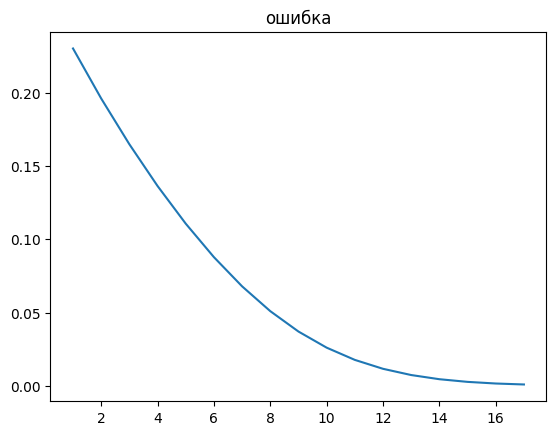

In [ ]:
plt.title('ошибка')
plt.plot(axis_x,axis_y)
plt.show()